In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/final/pat_adm_lab_vital.csv')
df.head()

patientunitstayid  aki_label  aki_offset  organsys_Cardiovascular  \
0             141284          0         NaN                        0   
1             141288          0         NaN                        1   
2             141360          0         NaN                        0   
3             141362          0         NaN                        0   
4             141415          0         NaN                        1   

   organsys_Gastrointestinal  organsys_Genitourinary  organsys_Hematology  \
0                          0                       0                    1   
1                          0                       0                    0   
2                          0                       0                    0   
3                          1                       0                    0   
4                          0                       0                    0   

   organsys_Metabolic/Endocrine  organsys_Musculoskeletal/Skin  \
0                             0                              0   
1                             0                              0   
2                             0                              0   
3                             0                              0   
4                             0                              0   

   organsys_Neurologic  ...  delta_result_sodium  min_sao2  max_sao2  \
0                    0  ...                  0.0      92.0     100.0   
1                    0  ...                  0.0      90.0     100.0   
2                    1  ...                  0.0      96.0     100.0   
3                    0  ...                  2.0      80.0      99.0   
4                    0  ...                  2.0      97.0     100.0   

   mean_sao2  min_heartrate  max_heartrate  mean_heartrate  min_respiration  \
0  96.073529           70.0          106.0       84.752613             10.0   
1  95.219512           80.0          106.0       91.857143             11.0   
2  98.602230           76.0          120.0       89.808118             11.0   
3  93.338129           92.0          120.0      103.592982             11.0   
4  98.353488           61.0           99.0       72.034722              8.0   

   max_respiration  mean_respiration  
0             36.0         21.254355  
1             46.0         21.972125  
2             36.0         17.656827  
3             42.0         24.518182  
4             57.0         15.880000  

[5 rows x 78 columns]

In [3]:
# keep track of index columns
index_cols = ['patientunitstayid'] # currently used as index

# keep track of cols important for stratification
strat_cols = ['unitvisitnumber', 'aki_label', 'unitdischargestatus_Alive']

# keep track of columns important for time tracking
time_cols = ['aki_offset', 'unitdischargeoffset']

# keep track of numerical columns
num_cols = ['age', 'min_result_BUN', 'min_result_Hct',
       'min_result_Hgb', 'min_result_RBC', 'min_result_WBC x 1000',
       'min_result_bicarbonate', 'min_result_calcium', 'min_result_chloride',
       'min_result_creatinine', 'min_result_glucose',
       'min_result_platelets x 1000', 'min_result_potassium',
       'min_result_sodium', 'max_result_BUN', 'max_result_Hct',
       'max_result_Hgb', 'max_result_RBC', 'max_result_WBC x 1000',
       'max_result_bicarbonate', 'max_result_calcium', 'max_result_chloride',
       'max_result_creatinine', 'max_result_glucose',
       'max_result_platelets x 1000', 'max_result_potassium',
       'max_result_sodium', 'delta_result_BUN', 'delta_result_Hct',
       'delta_result_Hgb', 'delta_result_RBC', 'delta_result_WBC x 1000',
       'delta_result_bicarbonate', 'delta_result_calcium',
       'delta_result_chloride', 'delta_result_creatinine',
       'delta_result_glucose', 'delta_result_platelets x 1000',
       'delta_result_potassium', 'delta_result_sodium']

# keep track of categorical columns
cat_cols = ['organsys_Cardiovascular', 'organsys_Gastrointestinal',
       'organsys_Genitourinary', 'organsys_Hematology',
       'organsys_Metabolic/Endocrine', 'organsys_Musculoskeletal/Skin',
       'organsys_Neurologic', 'organsys_Respiratory', 'organsys_Trauma',
       'from_or_Yes', 'gender_Female', 'ethnicity_African American',
       'ethnicity_Asian', 'ethnicity_Caucasian', 'ethnicity_Hispanic',
       'ethnicity_Other/Unknown', 'unittype_CCU-CTICU', 'unittype_CSICU',
       'unittype_Cardiac ICU', 'unittype_MICU', 'unittype_Med-Surg ICU',
       'unittype_Neuro ICU', 'unittype_SICU']

# keep track of target variables
target_cols = ['aki_label', 'unitdischargestatus_Alive']

In [4]:
df[df.aki_label==1].unitvisitnumber.value_counts()

1     1879
2      176
3       29
4       14
10       1
Name: unitvisitnumber, dtype: int64

In [5]:
df[df.aki_label==0].unitvisitnumber.value_counts()

1     67822
2      5246
3      1024
4       270
5        98
6        39
7        15
9         5
8         5
10        1
Name: unitvisitnumber, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split
random_state = 2020

# for now to the training on first admissions, will incorporate statified split for later visits next
df_1st_visit = df[df.unitvisitnumber==1]

# define explanatory and target arrays
X_y_label_offset = df_1st_visit[num_cols + cat_cols+['aki_label', 'aki_offset']]

# split into train-test
X_train_df, X_test_df = train_test_split(X_y_label_offset, test_size=0.2, random_state=random_state, \
                                                          stratify=X_y_label_offset['aki_label'])

In [10]:
X_train_df = X_train_df.reset_index()
X_test_df = X_test_df.reset_index()

In [11]:
pd.set_option('mode.chained_assignment', None)

# skale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_df[num_cols] = scaler.fit_transform(X_train_df[num_cols])
X_test_df[num_cols] = scaler.transform(X_test_df[num_cols])


In [43]:
# write a sample of 5 positive and 5 negative pateints to use for the demo
df_sample_1 = X_test_df[y_test==1].head()
df_sample_0 = X_test_df[y_test==0].head()
df_sample_combined = pd.concat([df_sample_1, df_sample_0], axis=0)
df_sample_combined

age  min_result_BUN  min_result_Hct  min_result_Hgb  \
41560 -1.622333       -0.755376        0.185520        0.318982   
1878   0.823921       -0.181409       -1.740625       -1.596322   
33936  0.585262       -0.039688        0.365294        0.281427   
8844   0.346603        1.448374        0.994501        1.107637   
76316  1.062580        0.810633        0.262566        0.281427   
53183  1.002915       -0.323129       -1.278350       -1.258327   
26783 -0.071050        1.023213        0.545067        0.469202   
25224  0.107944       -0.323129        0.403817        0.469202   
2093   0.465933       -0.606569        0.211202        0.356537   
56547  0.764256        0.314612       -0.931644       -0.920332   

       min_result_RBC  min_result_WBC x 1000  min_result_bicarbonate  \
41560       -0.389489               0.077844               -0.620186   
1878        -1.710270              -1.020495                1.241475   
33936       -0.015462              -0.673995                0.124478   
8844         0.428694              -0.157515                0.310644   
76316        0.113109               0.653164                0.124478   
53183       -1.312867              -0.693608               -0.247854   
26783        0.405318              -0.033298                0.124478   
25224        0.241681              -0.301345               -0.434020   
2093         0.183239               0.064768                0.124478   
56547       -0.915464              -0.419024               -0.620186   

       min_result_calcium  min_result_chloride  min_result_creatinine  ...  \
41560           -0.215308            -0.473097              -0.335431  ...   
1878             0.554127            -0.029858              -0.025486  ...   
33936            1.543399             0.708874              -0.011398  ...   
8844            -0.874823            -0.029858               0.368988  ...   
76316           -0.874823            -0.473097               0.988877  ...   
53183           -1.754177             0.413381              -0.166370  ...   
26783            0.114450             1.004367              -0.152282  ...   
25224           -0.545065             0.413381              -0.180459  ...   
2093            -0.215308            -0.029858              -0.208635  ...   
56547           -0.764904             0.561128              -0.307254  ...   

       ethnicity_Caucasian  ethnicity_Hispanic  ethnicity_Other/Unknown  \
41560                    0                   0                        1   
1878                     1                   0                        0   
33936                    1                   0                        0   
8844                     1                   0                        0   
76316                    1                   0                        0   
53183                    1                   0                        0   
26783                    0                   1                        0   
25224                    0                   0                        1   
2093                     1                   0                        0   
56547                    0                   0                        1   

       unittype_CCU-CTICU  unittype_CSICU  unittype_Cardiac ICU  \
41560                   0               0                     0   
1878                    0               0                     0   
33936                   0               0                     0   
8844                    0               0                     0   
76316                   0               0                     1   
53183                   0               0                     0   
26783                   0               0                     0   
25224                   0               0                     0   
2093                    0               0                     0   
56547                   0               0                     0   

       unittype_MICU  unittype_Med-Surg ICU  unittype_Neur

In [51]:
#df_sample_combined.to_csv('../data/final/df_sample.csv', index=False)
#df_sample = pd.read_csv('../data/final/df_sample.csv')
#df_sample.head()
df_sample.loc[0]

age                     -1.622333
min_result_BUN          -0.755376
min_result_Hct           0.185520
min_result_Hgb           0.318982
min_result_RBC          -0.389489
                           ...   
unittype_Cardiac ICU     0.000000
unittype_MICU            0.000000
unittype_Med-Surg ICU    1.000000
unittype_Neuro ICU       0.000000
unittype_SICU            0.000000
Name: 0, Length: 63, dtype: float64

In [12]:
SEED=2020
# import datetime
from datetime import datetime

# import a host of Scikit-learn models
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# import model metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# import ROC_AUC scoring, we will use area under the ROC curve for comparison
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix, classification_report

def get_models():
    """Generate a library of base learners."""
    nb = GaussianNB()
    svc = SVC(C=100, probability=True, class_weight='balanced')
    knn = KNeighborsClassifier(n_neighbors=3)
    lr = LogisticRegression(C=1, random_state=SEED, solver='liblinear', class_weight='balanced')
    nn = MLPClassifier((100, 50), early_stopping=True, random_state=SEED, max_iter=400, activation='tanh')
    gb = GradientBoostingClassifier(n_estimators=100, random_state=SEED)
    rf = RandomForestClassifier(n_estimators=10, max_features=3, random_state=SEED, class_weight='balanced')

    models = {#'svm': svc,
              'knn': knn,
              'naive bayes': nb,
              'mlp-nn': nn,
              'random forest': rf,
              'gbm': gb,
              'logistic': lr,
              }

    return models


def train_predict(model_list, xtrain, ytrain, xtest):
    """Fit models in list on training set and return preds"""
    P = np.zeros((y_test.shape[0], len(model_list)))
    P = pd.DataFrame(P)

    print("Fitting models.")
    cols = list()
    for i, (name, m) in enumerate(models.items()):
        current_time = datetime.now() 
        print("%s..." % name, end=" ", flush=False)
        m.fit(xtrain, ytrain)
        P.iloc[:, i] = m.predict_proba(xtest)[:, 1]
        cols.append(name)
        time_elapsed = datetime.now() - current_time
        print("Time elapsed ", time_elapsed)
        print("done")

    P.columns = cols
    print("Done.\n")
    return P


def score_models(P, y):
    """Score model in prediction DF"""
    print("Scoring models.")
    for m in P.columns:
        score = roc_auc_score(y, P.loc[:, m])
        ap = average_precision_score(y, P.loc[:, m])
        print("%-26s: %.3f, %.3f" % (m, score, ap))
    print("Done.\n")

In [9]:
X_train_df = X_train_df.fillna(X_train_df.median())
X_test_df = X_test_df.fillna(X_test_df.median())

In [11]:
X_train = X_train_df.values
X_test = X_test_df.values

models = get_models()
P = train_predict(models, X_train, y_train, X_test)
score_models(P, y_test)

Fitting models.
knn... Time elapsed  0:02:01.706390
done
naive bayes... Time elapsed  0:00:00.089425
done
mlp-nn... Time elapsed  0:00:05.099880
done
random forest... Time elapsed  0:00:00.632264
done
gbm... Time elapsed  0:00:26.865629
done
logistic... Time elapsed  0:00:04.851796
done
Done.

Scoring models.
knn                       : 0.554, 0.037
naive bayes               : 0.698, 0.071
mlp-nn                    : 0.771, 0.114
random forest             : 0.583, 0.039
gbm                       : 0.779, 0.116
logistic                  : 0.757, 0.100
Done.



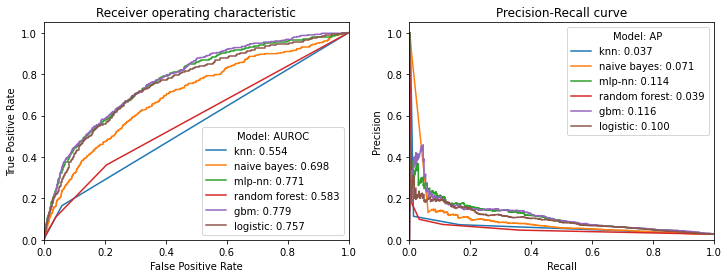

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))    
for column in P.columns:
    roc_auc = roc_auc_score(y_test, P[column])
    fpr, tpr, _ = roc_curve(y_test, P[column])
    ax[0].plot(fpr, tpr, label='%s: %0.3f' % (column, roc_auc))

    precision, recall, _ = precision_recall_curve(y_test, P[column])
    ave_prec_rec = average_precision_score(y_test, P[column])
    ax[1].plot(recall, precision, label='%s: %0.3f' % (column, ave_prec_rec))  

    ax[0].set_xlim([0.0, 1.0])
    ax[0].set_ylim([0.0, 1.05])
    ax[0].set_xlabel('False Positive Rate')
    ax[0].set_ylabel('True Positive Rate')
    ax[0].set_title('Receiver operating characteristic')
    ax[0].legend(loc="lower right", title="Model: AUROC")

    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_ylim([0.0, 1.05])
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    ax[1].set_title('Precision-Recall curve')
    ax[1].legend(loc="upper right", title="Model: AP")
    
#plt.savefig('../reports/figures/mult_models_after_feat_select.png', format='png')

In [30]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif

fs = SelectKBest(mutual_info_classif, k=40)
X_train_red = fs.fit_transform(X_train, y_train)
X_test_red = fs.transform(X_test)
print(X_train_red.shape)
print(X_test_red.shape)

(55760, 40)
(13941, 40)


In [31]:
models = get_models()
P = train_predict(models, X_train_red, y_train, X_test_red)
score_models(P, y_test)

Fitting models.
knn... Time elapsed  0:01:16.050628
done
naive bayes... Time elapsed  0:00:00.056235
done
mlp-nn... Time elapsed  0:00:04.259117
done
random forest... Time elapsed  0:00:00.650665
done
gbm... Time elapsed  0:00:18.500365
done
logistic... Time elapsed  0:00:01.748002
done
Done.

Scoring models.
knn                       : 0.537, 0.032
naive bayes               : 0.711, 0.075
mlp-nn                    : 0.752, 0.094
random forest             : 0.613, 0.049
gbm                       : 0.775, 0.120
logistic                  : 0.761, 0.098
Done.



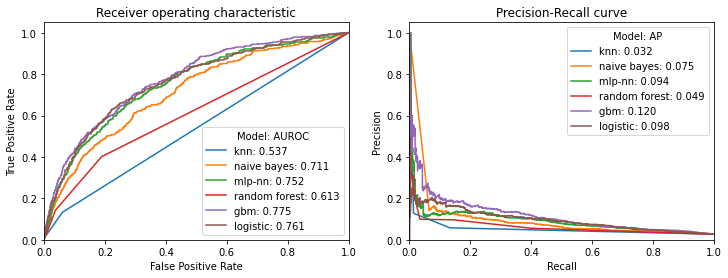

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))    
for column in P.columns:
    roc_auc = roc_auc_score(y_test, P[column])
    fpr, tpr, _ = roc_curve(y_test, P[column])
    ax[0].plot(fpr, tpr, label='%s: %0.3f' % (column, roc_auc))

    precision, recall, _ = precision_recall_curve(y_test, P[column])
    ave_prec_rec = average_precision_score(y_test, P[column])
    ax[1].plot(recall, precision, label='%s: %0.3f' % (column, ave_prec_rec))  

    ax[0].set_xlim([0.0, 1.0])
    ax[0].set_ylim([0.0, 1.05])
    ax[0].set_xlabel('False Positive Rate')
    ax[0].set_ylabel('True Positive Rate')
    ax[0].set_title('Receiver operating characteristic')
    ax[0].legend(loc="lower right", title="Model: AUROC")

    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_ylim([0.0, 1.05])
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    ax[1].set_title('Precision-Recall curve')
    ax[1].legend(loc="upper right", title="Model: AP")

In [38]:
X_train_df.to_csv('../data/final/X_train_df.csv')
X_test_df.to_csv('../data/final/X_test_df.csv')
y_train_ser = pd.Series(y_train)
y_train_ser.to_csv('../data/final/y_train_ser.csv', index=False)
y_test_ser = pd.Series(y_test)
y_test_ser.to_csv('../data/final/y_test_ser.csv', index=False)

In [17]:
X_train = X_train_df.drop(columns=['index', 'aki_label', 'aki_offset']).fillna(X_train_df.drop(columns=['index', 'aki_label', 'aki_offset']).median()).values
X_test = X_test_df.drop(columns=['index', 'aki_label', 'aki_offset']).fillna(X_test_df.drop(columns=['index', 'aki_label', 'aki_offset']).median()).values
y_train = X_train_df['aki_label'].values
y_test = X_test_df['aki_label'].values

In [37]:
#gb = GradientBoostingClassifier(n_estimators=100, random_state=SEED)
#gb.fit(X_train, y_train)
y_pred = gb.predict_proba(X_test)[:,1]

In [40]:
X_y_pred_test = pd.concat([X_test_df, pd.Series(y_test), pd.Series(y_pred)], axis=1, ignore_index=True)
X_y_pred_test.columns = X_test_df.columns.tolist()+['y_test', 'y_pred']
X_y_pred_test

index       age  min_result_BUN  min_result_Hct  min_result_Hgb  \
0      53183  1.002915       -0.323129       -1.278350       -1.258327   
1      26783 -0.071050        1.023213        0.545067        0.469202   
2      25224  0.107944       -0.323129        0.403817        0.469202   
3       2093  0.465933       -0.606569        0.211202        0.356537   
4      56547  0.764256        0.314612       -0.931644       -0.920332   
...      ...       ...             ...             ...             ...   
13936  22152 -1.443338       -1.031730        0.468022        0.431647   
13937  37102  0.227274       -0.181409       -1.766307       -1.708987   
13938  64567  0.286939        0.172892       -0.533574       -0.019013   
13939  31404  0.346603       -0.252269       -0.764711       -0.657448   
13940  63036  1.002915       -0.181409        0.545067        0.131207   

       min_result_RBC  min_result_WBC x 1000  min_result_bicarbonate  \
0           -1.312867              -0.693608               -0.247854   
1            0.405318              -0.033298                0.124478   
2            0.241681              -0.301345               -0.434020   
3            0.183239               0.064768                0.124478   
4           -0.915464              -0.419024               -0.620186   
...               ...                    ...                     ...   
13936        0.136486              -0.606003               -0.992518   
13937       -1.955725               0.002006               -0.620186   
13938        0.393629               0.718541                     NaN   
13939       -0.751827              -0.458250                0.310644   
13940        0.335188              -0.392873                2.358471   

       min_result_calcium  min_result_chloride  ...  unittype_CSICU  \
0               -1.754177             0.413381  ...               0   
1                0.114450             1.004367  ...               0   
2               -0.545065             0.413381  ...               0   
3               -0.215308            -0.029858  ...               0   
4               -0.764904             0.561128  ...               0   
...                   ...                  ...  ...             ...   
13936           -1.754177             0.708874  ...               0   
13937                 NaN             1.299860  ...               0   
13938           -0.874823             0.413381  ...               0   
13939           -0.545065             0.561128  ...               0   
13940            0.993803            -0.029858  ...               0   

       unittype_Cardiac ICU  unittype_MICU  unittype_Med-Surg ICU  \
0                         0              0                      1   
1                         0              0                      1   
2                         0              1                      0   
3                         0              0                      0   
4                         0              0                      1   
...                     ...            ...                    ...   
13936                     0              0                      1   
13937                     0              0                      1   
13938                     0              0                      0   
13939                     0              0                      0   
13940                     1              0                      0   

       unittype_Neuro ICU  unittype_SICU  aki_label  aki_offset  y_test  \
0                       0              0          0         NaN       0   
1                       0              0          0         NaN       0   
2                       0              0          0         NaN       0   
3                       1              0          0         NaN       0   
4                       0              0          0         NaN       0   
...                   ...            ...        ...         ...     ...   
13936                   0              0      

In [41]:
X_y_pred_test['aki_offset_day'] = X_y_pred_test['aki_offset']/(60*24)
X_y_pred_test[X_y_pred_test.aki_offset.notnull()]

index       age  min_result_BUN  min_result_Hct  min_result_Hgb  \
40     41560 -1.622333       -0.755376        0.185520        0.318982   
142     1878  0.823921       -0.181409       -1.740625       -1.596322   
152    33936  0.585262       -0.039688        0.365294        0.281427   
174     8844  0.346603        1.448374        0.994501        1.107637   
184    76316  1.062580        0.810633        0.262566        0.281427   
...      ...       ...             ...             ...             ...   
13687   2862 -0.011385       -0.110548        0.647795        0.769642   
13729  10983  0.286939        0.031172       -1.201304       -0.995442   
13763  57182 -1.741662       -0.323129        1.610868        1.783627   
13778  22177  0.823921        2.652996        0.211202        0.431647   
13846  14477 -0.727362        2.511276       -0.482210       -0.695003   

       min_result_RBC  min_result_WBC x 1000  min_result_bicarbonate  \
40          -0.389489               0.077844               -0.620186   
142         -1.710270              -1.020495                1.241475   
152         -0.015462              -0.673995                0.124478   
174          0.428694              -0.157515                0.310644   
184          0.113109               0.653164                0.124478   
...               ...                    ...                     ...   
13687        0.767656               0.849296               -0.434020   
13729       -1.266114              -0.628231               -0.620186   
13763        1.819606               0.103995                0.310644   
13778       -0.062216              -0.150977               -1.364850   
13846       -0.716762               0.600862               -0.247854   

       min_result_calcium  min_result_chloride  ...  unittype_Cardiac ICU  \
40              -0.215308            -0.473097  ...                     0   
142              0.554127            -0.029858  ...                     0   
152              1.543399             0.708874  ...                     0   
174             -0.874823            -0.029858  ...                     0   
184             -0.874823            -0.473097  ...                     1   
...                   ...                  ...  ...                   ...   
13687           -0.654985             0.413381  ...                     0   
13729           -0.325227             0.561128  ...                     0   
13763            0.773965             0.265635  ...                     0   
13778           -0.764904            -0.473097  ...                     0   
13846           -0.654985             1.004367  ...                     0   

       unittype_MICU  unittype_Med-Surg ICU  unittype_Neuro ICU  \
40                 0                      1                   0   
142                0                      0                   1   
152                0                      0                   1   
174                1                      0                   0   
184                0                      0                   0   
...              ...                    ...                 ...   
13687              0                      1                   0   
13729              0                      0                   0   
13763              0                      1                   0   
13778              0                      1                   0   
13846              0                      1                   0   

       unittype_SICU  aki_label  aki_offset  y_test    y_pred  aki_offset_day  
40                 0          1      3883.0       1  0.009666        2.696528  
142                0          1     12577.0       1  0.037027        8.734028  
152                0          1      2103.0       1  0.006472        1.460417  
174                0          1      7318.0       1  0.075756        5.081944  
184                0          1      4382.0       1  0.098765        3.043056  
...              ...        ...         ...

In [61]:
#df_subset = df[['patientunitstayid', 'max_result_creatinine', 'min_result_calcium', 'min_result_WBC x 1000', \
#                          'delta_result_bicarbonate', 'aki_label']]
df_subset.dropna(inplace=True)

In [63]:
df_subset['aki_label'] = df_subset['aki_label'].astype(int)
df_subset['aki_label'] = df_subset['aki_label'].apply(pd.to_numeric, downcast="integer")
df_subset['aki_label'].describe()

count    69031.000000
mean         0.029146
std          0.168218
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: aki_label, dtype: float64

In [71]:
df_subset.to_csv('../data/final/var_subset.csv')

In [64]:
#import plotly.express as px
df_subset.loc[df_subset['aki_label']==1, 'Acute kidney injury'] = 'yes'
df_subset.loc[df_subset['aki_label']==0, 'Acute kidney injury'] = 'no'

fig = px.scatter(df_subset, x='min_result_calcium', y='max_result_creatinine', color='Acute kidney injury')
fig.show()

In [70]:
import plotly.graph_objects as go

fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x=df_subset[df_subset['aki_label']==0]['min_result_calcium'],\
                         y=df_subset[df_subset['aki_label']==0]['max_result_creatinine'], \
                    mode='markers',
                    name='negative class'))

fig.add_trace(go.Scatter(x=df_subset[df_subset['aki_label']==1]['min_result_calcium'],\
                         y=df_subset[df_subset['aki_label']==1]['max_result_creatinine'], \
                    mode='markers',
                    name='positive class'))

fig.add_trace(go.Scatter(x=[5], y=[30],
                    mode='markers',
                    name='hypothetical patient'))

fig.update_layout(title='Creatinine and calcium levels by patient class',
                 xaxis_title="Minimum Calcium level (mg/dL)",
                 yaxis_title="Maximum Creatinine level (mg/dL)",)


fig.show()

In [72]:
import json
graphJSON = json.dumps(fig, cls=plotly.utils.PlotlyJSONEncoder)

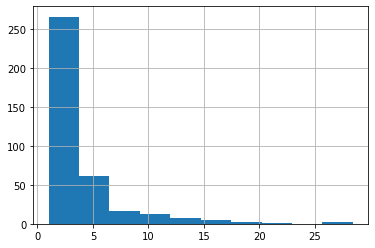

In [31]:
wrong_pred_offset.aki_offset_day.hist()

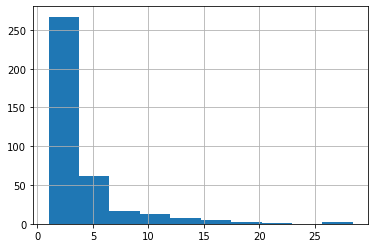

In [32]:
X_y_pred_test.aki_offset_day.hist()

In [38]:
score = roc_auc_score(y_test, y_pred)
ap = average_precision_score(y_test, y_pred)

In [39]:
print(score, ap)

0.7785718487032491 0.11621831939118292
